# import library yg dibutuhkan

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.cluster import KMeans

# membaca dataset

In [59]:
df = pd.read_csv('Mall_Customers.csv')


In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# distribusi variabel numerik

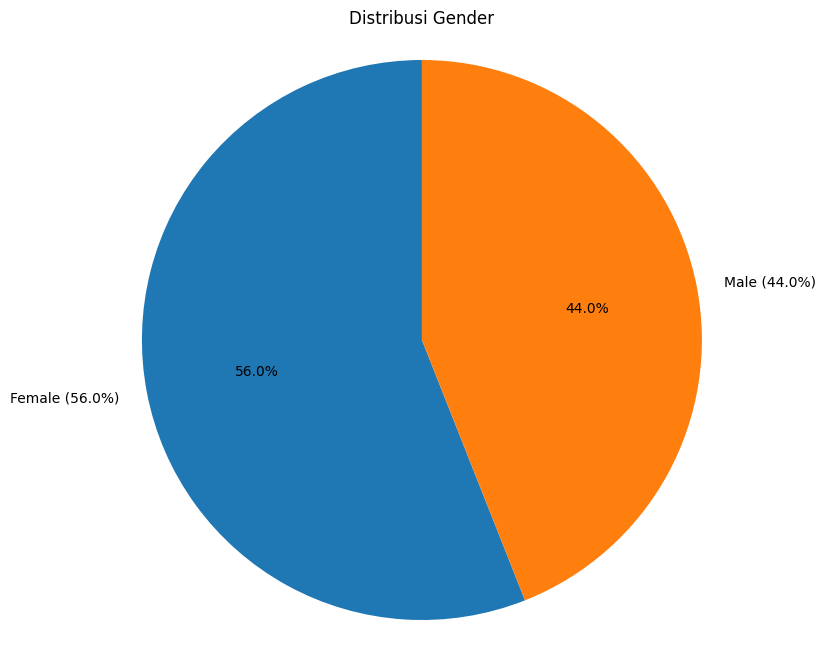

Persentase Gender:
Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


In [62]:
# Klasifikasi Gender
gender_counts = df['Gender'].value_counts()
gender_percentages = gender_counts / len(df) * 100

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_percentages, labels=[f'{index} ({value:.1f}%)' for index, value in gender_percentages.items()], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.axis('equal')
plt.show()

print("Persentase Gender:")
print(gender_percentages)

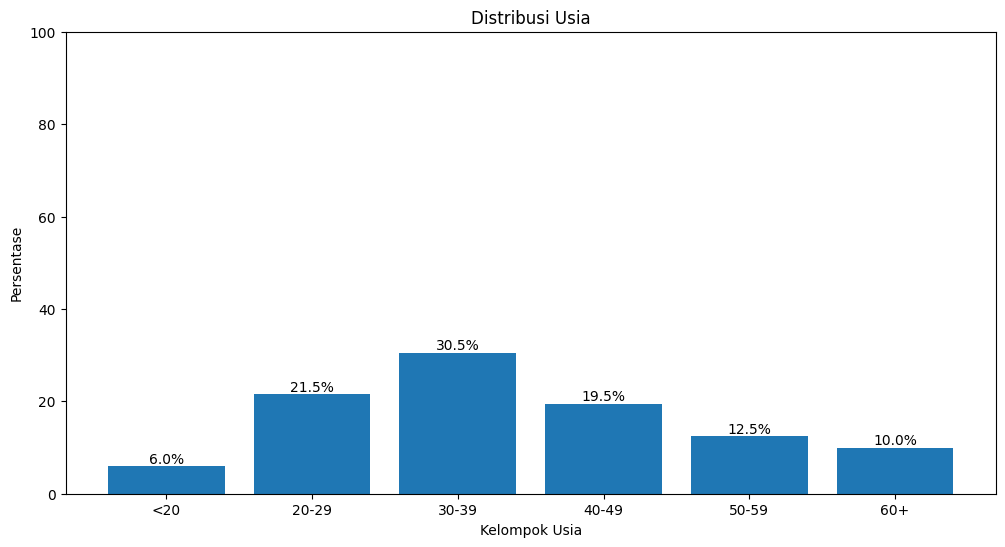


Persentase Kelompok Usia:
AgeGroup
<20       6.0
20-29    21.5
30-39    30.5
40-49    19.5
50-59    12.5
60+      10.0
Name: count, dtype: float64


In [63]:
# Klasifikasi Usia
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_percentages = df['AgeGroup'].value_counts().sort_index() / len(df) * 100

# Membuat bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(age_percentages.index, age_percentages.values)
plt.title('Distribusi Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Persentase')
plt.ylim(0, 100)

# Menambahkan label persentase di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.show()

print("\nPersentase Kelompok Usia:")
print(age_percentages)

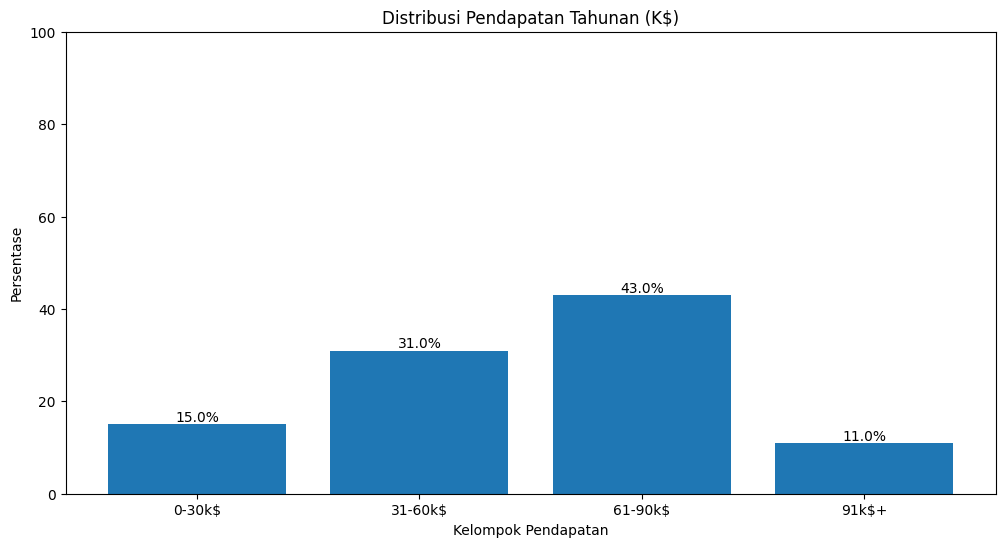


Persentase Kelompok Pendapatan:
IncomeGroup
0-30k$     15.0
31-60k$    31.0
61-90k$    43.0
91k$+      11.0
Name: count, dtype: float64


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari CSV
df = pd.read_csv('Mall_Customers.csv')

# Klasifikasi Pendapatan Tahunan
income_bins = [0, 30, 60, 90, 150]
income_labels = ['0-30k$', '31-60k$', '61-90k$', '91k$+']
df['IncomeGroup'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)
income_percentages = df['IncomeGroup'].value_counts().sort_index() / len(df) * 100

# Membuat bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(income_percentages.index, income_percentages.values)
plt.title('Distribusi Pendapatan Tahunan (K$)')
plt.xlabel('Kelompok Pendapatan')
plt.ylabel('Persentase')
plt.ylim(0, 100)

# Menambahkan label persentase di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.show()

print("\nPersentase Kelompok Pendapatan:")
print(income_percentages)

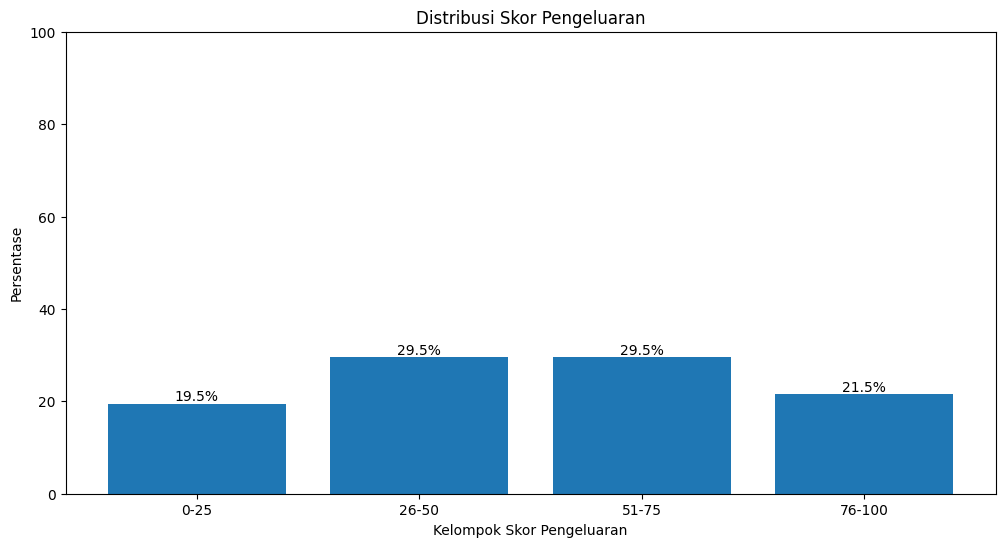


Persentase Kelompok Skor Pengeluaran:
SpendingGroup
0-25      19.5
26-50     29.5
51-75     29.5
76-100    21.5
Name: count, dtype: float64


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari CSV
df = pd.read_csv('Mall_Customers.csv')

# Klasifikasi Skor Pengeluaran
spending_bins = [0, 25, 50, 75, 100]
spending_labels = ['0-25', '26-50', '51-75', '76-100']
df['SpendingGroup'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels, right=False)
spending_percentages = df['SpendingGroup'].value_counts().sort_index() / len(df) * 100

# Membuat bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(spending_percentages.index, spending_percentages.values)
plt.title('Distribusi Skor Pengeluaran')
plt.xlabel('Kelompok Skor Pengeluaran')
plt.ylabel('Persentase')
plt.ylim(0, 100)

# Menambahkan label persentase di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.show()

print("\nPersentase Kelompok Skor Pengeluaran:")
print(spending_percentages)

# Correlation matrix

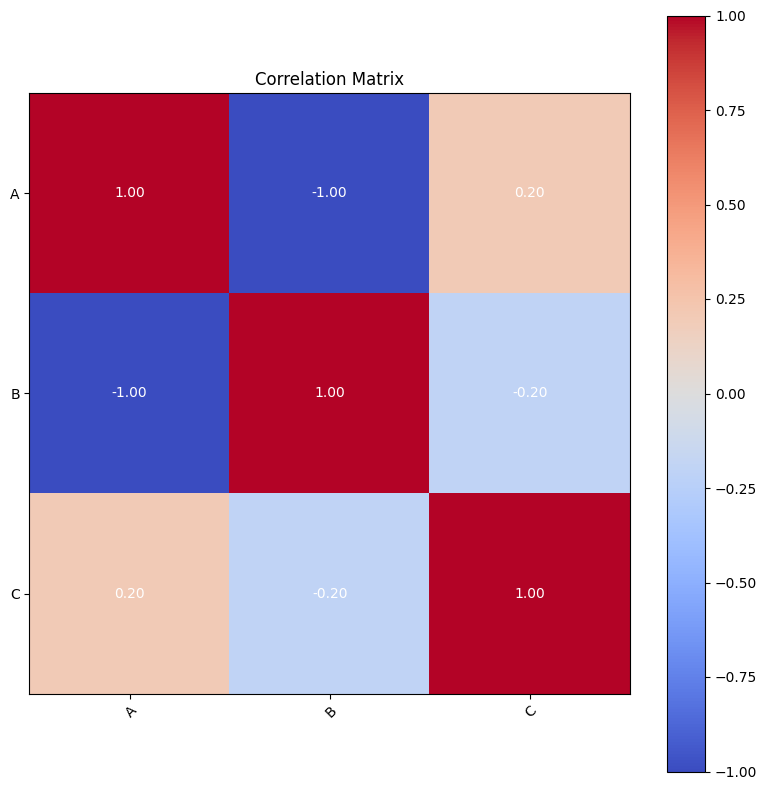

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna(axis=1)[[col for col in df1.dropna(axis=1) if df1.dropna(axis=1)[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df1)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]

    # Calculate correlation matrix
    corr = df1.corr()

    # Plot correlation matrix
    fig, ax = plt.subplots(figsize=(plotSize, plotSize))
    im = ax.imshow(corr, cmap='coolwarm')

    # Set axis labels and title
    ax.set_xticks(np.arange(len(columnNames)))
    ax.set_yticks(np.arange(len(columnNames)))
    ax.set_xticklabels(columnNames)
    ax.set_yticklabels(columnNames)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.title('Correlation Matrix')

    # Add correlation values as annotations
    for i in range(len(columnNames)):
        for j in range(len(columnNames)):
            text = ax.text(j, i, '{:.2f}'.format(corr.iloc[i, j]),
                           ha="center", va="center", color="w")

    # Add colorbar
    plt.colorbar(im)

    plt.tight_layout()
    plt.show()

# Create a sample DataFrame (replace this with your actual data loading)
df1 = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [5, 4, 3, 2, 1],
                     'C': [2, 3, 5, 1, 4]})

# Now you can call the function
plotCorrelationMatrix(df1, 8, "My DataFrame") # Replace "My DataFrame" with the actual name if needed

# menentukan jumlah cluster dengan elbow

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

Text(5, 150000, 'possible elbow point')

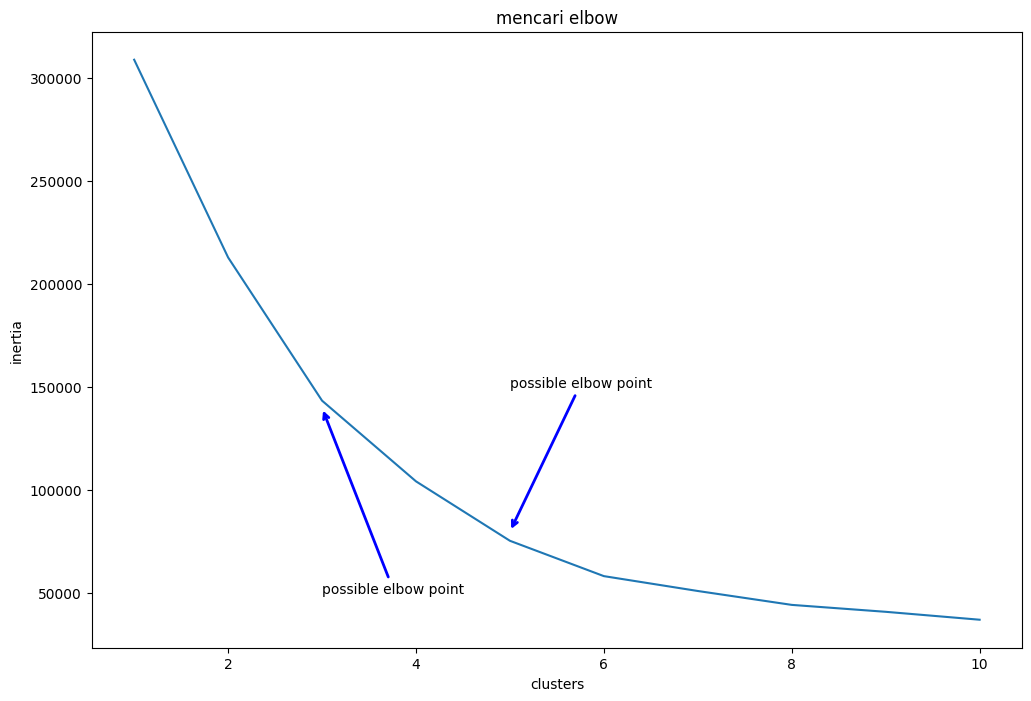

In [67]:
cluster=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('possible elbow point', xy=(3, 140000), xytext=(3, 50000),xycoords= 'data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('possible elbow point', xy=(5, 80000), xytext=(5, 150000),xycoords= 'data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

 # proses clustering

In [68]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


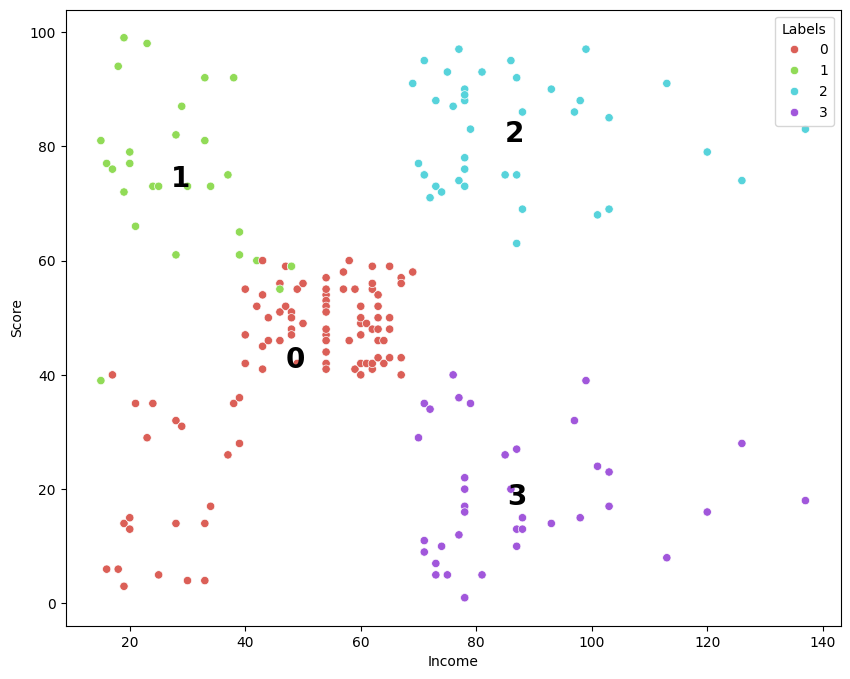

In [69]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X, palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['Income'].mean(),
                  X[X['Labels']==label]['Score'].mean()),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  color='black')


In [70]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       1
1     21      15     81       1
2     20      16      6       0
3     23      16     77       1
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       2
196   45     126     28       3
197   32     126     74       2
198   32     137     18       3
199   30     137     83       2

[200 rows x 4 columns]
